<a href="https://colab.research.google.com/github/wallinsonsilva/ciencia_de_dados_covid/blob/master/VisualizacaoDadosCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import plotly.express as px
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [162]:
dados = pd.read_csv('/content/drive/My Drive/Projeto Ciencia de dados - COVID 19/Dados Gerados/ET_dados_casos_mun_reg_igbe_geoses.csv')
dados.head()

,codmun,municipio,codRegiaoSaude,nomeRegiaoSaude,populacaoTCU2019,casosAcumulado,obitosAcumulado,porcentagem_casos_hab,porcentagem_obitos_casos,CIR,CodRegiao,Sede,Região de Saúde,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Código Município,Código Município Completo,Municipio,CodMunIBGE,Código,Área Territorial - km²,População estimada - pessoas,Densidade demográfica - hab/km²,Escolarização 6 a 14 anos,IDHM - Índice de desenvolvimento humano municipal,Mortalidade infantil - óbitos por mil nascidos vivos,Receitas realizadas - R$ (×1000),Despesas empenhadas - R$ (×1000) [2017],PIB per capita - R$,v0002_codigo_do_municipio,GeoSES,educação,mobilidade,pobreza,privacao_material,riqueza,renda,segregacao
0,240010,Acari,24004,4ª REGIAO DE SAUDE - CAICO,11136,61,3,0.005478,0.049180,1,24001,São José de Mipibu,Litoral Sul/Agreste,4,Leste Potiguar,19,Litoral Sul,1206,2401206,Arês,240010,2401206,115.407,14306,111.89,97.8,0.606,21.62,37742.71317,36142.88627,25320.79,2401206,-0.647302,72.117813,0,64.150707,11.024704,0.264573,1181.152307,0.063689
1,240020,Açu,24008,8ª REGIAO DE SAUDE - ACU,58017,1167,51,0.020115,0.043702,1,24001,São José de Mipibu,Litoral Sul/Agreste,4,Leste Potiguar,19,Litoral Sul,1404,2401404,Baía Formosa,240020,2401404,247.484,9271,34.90,98.1,0.609,15.75,23656.20599,22372.78323,14474.61,2401404,-0.562420,71.767885,0,60.811667,17.638927,0.991362,1318.135729,0.075266
2,240030,Afonso Bezerra,24003,3ª REGIAO DE SAUDE - JOAO CAMARA,11035,101,6,0.009153,0.059406,1,24001,São José de Mipibu,Litoral Sul/Agreste,2,Central Potiguar,8,Macau,1859,2401859,Brejinho,240030,2401859,225.633,6549,31.74,97.3,0.574,12.35,14708.53170,12637.13207,10478.59,2401859,-0.749169,77.517295,0,66.610927,5.009073,0.323988,1119.490015,0.037168
3,240040,Água Nova,24006,6ª REGIAO DE SAUDE - PAU DOS FERROS,3252,20,0,0.006150,0.000000,1,24001,São José de Mipibu,Litoral Sul/Agreste,1,Oeste Potiguar,2,Chapada do Apodi,2303,2402303,Canguaretama,240040,2402303,1095.803,20493,17.88,98.7,0.638,4.10,42320.08649,38889.63622,14679.06,2402303,-0.499886,69.243226,0,59.029826,10.473723,0.892660,1233.537515,0.097144
4,240050,Alexandria,24006,6ª REGIAO DE SAUDE - PAU DOS FERROS,13577,44,4,0.003241,0.090909,1,24001,São José de Mipibu,Litoral Sul/Agreste,4,Leste Potiguar,18,Natal,3608,2403608,Espírito Santo,240050,2403608,140.639,28583,176.03,96.6,0.660,15.82,80913.26618,72936.48877,13667.37,2403608,-0.522203,67.440687,0,53.406674,17.139449,0.911317,1593.480555,0.038111


In [163]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 40 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   codmun                                                167 non-null    int64  
 1   municipio                                             167 non-null    object 
 2   codRegiaoSaude                                        167 non-null    int64  
 3   nomeRegiaoSaude                                       167 non-null    object 
 4   populacaoTCU2019                                      167 non-null    int64  
 5   casosAcumulado                                        167 non-null    int64  
 6   obitosAcumulado                                       167 non-null    int64  
 7   porcentagem_casos_hab                                 167 non-null    float64
 8   porcentagem_obitos_casos                              167 no

Text(0.5, 0, 'Distribuição da Quantidade de Casos Por Municipio')

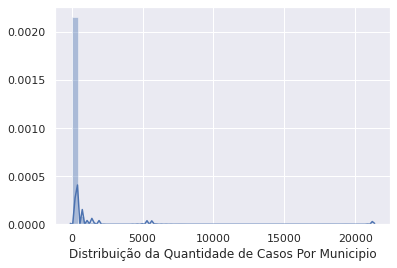

In [164]:
sns.distplot(dados["casosAcumulado"])
plt.xlabel('Distribuição da Quantidade de Casos Por Municipio')

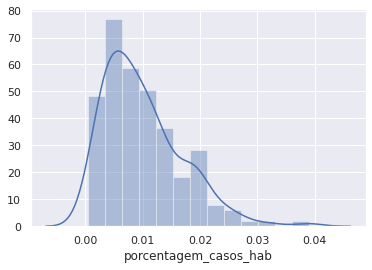

In [165]:
sns.distplot(dados["porcentagem_casos_hab"])

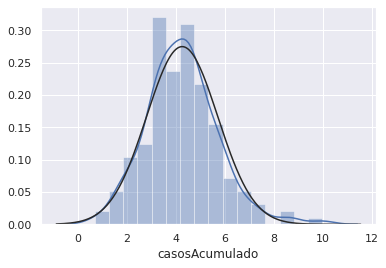

In [166]:
casos_log = np.log(dados["casosAcumulado"])
sns.distplot(casos_log,fit=norm)

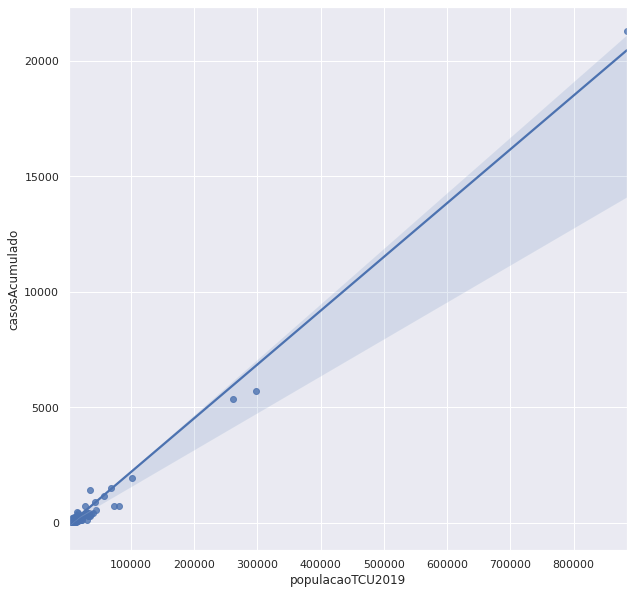

In [167]:
populacao_casoacumulado = dados.loc[:,['populacaoTCU2019','casosAcumulado']]
plt.figure(figsize=(10, 10))
sns.regplot(x="populacaoTCU2019", y="casosAcumulado", data=populacao_casoacumulado)
plt.show()

In [168]:
populacao_casoacumulado.corr()

,populacaoTCU2019,casosAcumulado
populacaoTCU2019,1.000000,0.993275
casosAcumulado,0.993275,1.000000


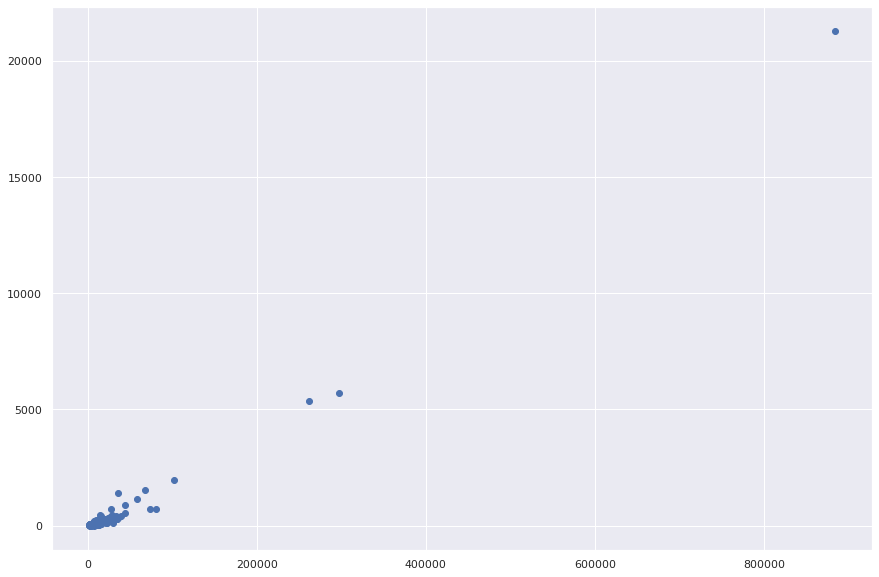

In [169]:
plt.figure(figsize=(50, 10))
plt.subplot(131)
plt.scatter(dados['populacaoTCU2019'], dados['casosAcumulado'])

In [170]:
dados['casosAcumulado'].sum()

57072

In [171]:
casos_regiao = pd.pivot_table(dados, index=['codRegiaoSaude','nomeRegiaoSaude'],values=['casosAcumulado','obitosAcumulado'],aggfunc=np.sum)
casos_regiao['porcentagem_obito'] = casos_regiao['obitosAcumulado'] / casos_regiao['casosAcumulado']
casos_regiao = casos_regiao.reset_index()
casos_regiao

,codRegiaoSaude,nomeRegiaoSaude,casosAcumulado,obitosAcumulado,porcentagem_obito
0,24001,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,4526,133,0.029386
1,24002,2ª REGIAO DE SAUDE - MOSSORO,9443,308,0.032617
2,24003,3ª REGIAO DE SAUDE - JOAO CAMARA,3762,133,0.035354
3,24004,4ª REGIAO DE SAUDE - CAICO,3726,73,0.019592
4,24005,5ª REGIAO DE SAUDE - SANTA CRUZ,2120,60,0.028302
5,24006,6ª REGIAO DE SAUDE - PAU DOS FERROS,1030,36,0.034951
6,24007,7ª REGIAO DE SAUDE - METROPOLITANA,29774,1184,0.039766
7,24008,8ª REGIAO DE SAUDE - ACU,2691,109,0.040505


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

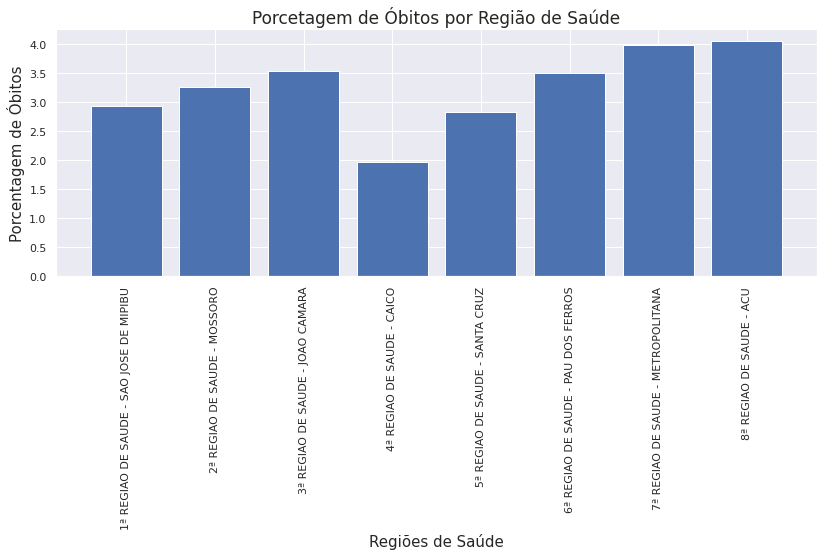

In [172]:
plt.figure(figsize=(30,10))
plt.subplot(221)
plt.bar(casos_regiao['nomeRegiaoSaude'],casos_regiao['porcentagem_obito']*100)
plt.title('Porcetagem de Óbitos por Região de Saúde', fontsize=17)
plt.ylabel('Porcentagem de Óbitos', fontsize=15)
plt.xlabel('Regiões de Saúde', fontsize=15)
plt.xticks(rotation=90)

In [173]:
dados.query("nomeRegiaoSaude == '8ª REGIAO DE SAUDE - ACU'")['Densidade demográfica - hab/km²'].describe()

count     12.000000
mean      49.176667
std       47.313531
min       17.750000
25%       23.062500
50%       33.670000
75%       48.545000
max      188.060000
Name: Densidade demográfica - hab/km², dtype: float64

In [174]:
dados['IDHM - Índice de desenvolvimento humano municipal'].describe()

count    167.000000
mean       0.610850
std        0.037868
min        0.530000
25%        0.587000
50%        0.606000
75%        0.627000
max        0.766000
Name: IDHM - Índice de desenvolvimento humano municipal, dtype: float64

In [175]:
dados['Receitas realizadas - R$ (×1000)'].describe()

count    1.670000e+02
mean     5.127716e+04
std      1.760138e+05
min      1.166515e+04
25%      1.582156e+04
50%      2.149873e+04
75%      3.435993e+04
max      2.168783e+06
Name: Receitas realizadas - R$ (×1000), dtype: float64

In [176]:
dados['Receitas realizadas - R$ (×1000)'].sort_values().head(-1)

149     11665.14807
134     11878.57135
121     12333.36163
160     12612.49502
75      12735.97450
           ...     
151    180037.98756
34     228879.08201
154    234196.24888
153    444026.48992
37     569369.80668
Name: Receitas realizadas - R$ (×1000), Length: 166, dtype: float64

In [177]:
dados['Despesas empenhadas - R$ (×1000) [2017]'].describe()

count    1.670000e+02
mean     4.781714e+04
std      1.681690e+05
min      8.910461e+03
25%      1.465353e+04
50%      1.973688e+04
75%      3.441660e+04
max      2.087214e+06
Name: Despesas empenhadas - R$ (×1000) [2017], dtype: float64

In [178]:
pib = pd.DataFrame()
pib['1'] = dados.query("CIR == '1'")['PIB per capita - R$'].describe()
pib['2'] = dados.query("CIR == '2'")['PIB per capita - R$'].describe()
pib['3'] = dados.query("CIR == '3'")['PIB per capita - R$'].describe()
pib['4'] = dados.query("CIR == '4'")['PIB per capita - R$'].describe()
pib['5'] = dados.query("CIR == '5'")['PIB per capita - R$'].describe()
pib['6'] = dados.query("CIR == '6'")['PIB per capita - R$'].describe()
pib['7'] = dados.query("CIR == '7'")['PIB per capita - R$'].describe()
pib['8'] = dados.query("CIR == '8'")['PIB per capita - R$'].describe()

In [179]:
pib

,1,2,3,4,5,6,7,8
count,27.000000,14.000000,26.000000,25.000000,21.000000,37.000000,5.000000,12.000000
mean,11474.062963,21309.807857,20007.379615,11311.069600,13999.122857,9370.111351,18247.904000,13464.217500
std,5018.087902,25052.686399,20348.289647,3696.819811,18990.617703,3279.749730,5493.806448,5925.843195
min,7233.340000,6535.600000,6952.070000,6739.350000,7012.830000,6696.490000,12603.870000,8111.900000
25%,8118.295000,9999.385000,8692.707500,8637.100000,8058.920000,7709.460000,13935.050000,10100.667500
50%,9276.540000,14820.865000,10973.735000,10508.720000,8680.270000,8547.460000,18483.390000,11244.805000
75%,13354.410000,20248.705000,18160.130000,13508.280000,11888.000000,9306.890000,19720.130000,15853.457500
max,25320.790000,106121.530000,80444.020000,21851.520000,96049.410000,25167.790000,26497.080000,28772.810000


In [180]:
dados[['populacaoTCU2019','Receitas realizadas - R$ (×1000)','Despesas empenhadas - R$ (×1000) [2017]','IDHM - Índice de desenvolvimento humano municipal','Densidade demográfica - hab/km²','PIB per capita - R$','casosAcumulado','obitosAcumulado']].corr()

,populacaoTCU2019,Receitas realizadas - R$ (×1000),Despesas empenhadas - R$ (×1000) [2017],IDHM - Índice de desenvolvimento humano municipal,Densidade demográfica - hab/km²,PIB per capita - R$,casosAcumulado,obitosAcumulado
populacaoTCU2019,1.000000,-0.021385,-0.021063,0.100372,-0.013707,-0.020991,0.993275,0.982240
Receitas realizadas - R$ (×1000),-0.021385,1.000000,0.999614,0.456953,0.952144,0.144547,-0.025639,-0.023394
Despesas empenhadas - R$ (×1000) [2017],-0.021063,0.999614,1.000000,0.450819,0.953051,0.140055,-0.025057,-0.023009
IDHM - Índice de desenvolvimento humano municipal,0.100372,0.456953,0.450819,1.000000,0.411272,0.054095,0.079489,0.086925
Densidade demográfica - hab/km²,-0.013707,0.952144,0.953051,0.411272,1.000000,0.071840,-0.018198,-0.016893
PIB per capita - R$,-0.020991,0.144547,0.140055,0.054095,0.071840,1.000000,-0.025631,-0.026424
casosAcumulado,0.993275,-0.025639,-0.025057,0.079489,-0.018198,-0.025631,1.000000,0.991291
obitosAcumulado,0.982240,-0.023394,-0.023009,0.086925,-0.016893,-0.026424,0.991291,1.000000


In [181]:
regiao_pib = pd.pivot_table(dados, index=['nomeRegiaoSaude'],
                              aggfunc={'populacaoTCU2019':np.sum,
                                       'casosAcumulado':np.sum,
                                       'obitosAcumulado':np.sum,
                                       'IDHM - Índice de desenvolvimento humano municipal':'mean',
                                       'PIB per capita - R$':lambda x: np.percentile(x, 75)}
                            )
regiao_pib['porcentagem_obito'] = regiao_pib['obitosAcumulado'] / regiao_pib['casosAcumulado']
regiao_pib['porcentagem_contagio'] = regiao_pib['casosAcumulado'] / regiao_pib['populacaoTCU2019']
regiao_pib = regiao_pib.reset_index()
regiao_pib.rename(columns={'IDHM - Índice de desenvolvimento humano municipal':'IDHM'}, inplace=True)
regiao_pib

,nomeRegiaoSaude,IDHM,PIB per capita - R$,casosAcumulado,obitosAcumulado,populacaoTCU2019,porcentagem_obito,porcentagem_contagio
0,1ª REGIAO DE SAUDE - SAO JOSE DE MIPIBU,0.620741,13636.3450,4526,133,385562,0.029386,0.011739
1,2ª REGIAO DE SAUDE - MOSSORO,0.597714,9840.1925,9443,308,489496,0.032617,0.019291
2,3ª REGIAO DE SAUDE - JOAO CAMARA,0.607385,14647.0050,3762,133,352633,0.035354,0.010668
3,4ª REGIAO DE SAUDE - CAICO,0.602760,11625.6000,3726,73,311037,0.019592,0.011979
4,5ª REGIAO DE SAUDE - SANTA CRUZ,0.611286,16194.8900,2120,60,201256,0.028302,0.010534
5,6ª REGIAO DE SAUDE - PAU DOS FERROS,0.618162,14679.0600,1030,36,251618,0.034951,0.004094
6,7ª REGIAO DE SAUDE - METROPOLITANA,0.607800,9730.4800,29774,1184,1357366,0.039766,0.021935
7,8ª REGIAO DE SAUDE - ACU,0.606250,13349.0775,2691,109,157885,0.040505,0.017044


In [182]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 40 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   codmun                                                167 non-null    int64  
 1   municipio                                             167 non-null    object 
 2   codRegiaoSaude                                        167 non-null    int64  
 3   nomeRegiaoSaude                                       167 non-null    object 
 4   populacaoTCU2019                                      167 non-null    int64  
 5   casosAcumulado                                        167 non-null    int64  
 6   obitosAcumulado                                       167 non-null    int64  
 7   porcentagem_casos_hab                                 167 non-null    float64
 8   porcentagem_obitos_casos                              167 no

In [183]:
principais_dados = dados[['codmun','municipio','CIR','populacaoTCU2019','casosAcumulado','obitosAcumulado',
                                              'IDHM - Índice de desenvolvimento humano municipal',
                                              'PIB per capita - R$','Código Município Completo','GeoSES',
                                              'educação','mobilidade','pobreza','privacao_material',
                                              'riqueza','renda','segregacao']]
principais_dados['porcentagem_obito'] = principais_dados['obitosAcumulado'] / principais_dados['casosAcumulado']
principais_dados['porcent_pop_contagiada'] = principais_dados['casosAcumulado'] / principais_dados['populacaoTCU2019']
principais_dados.rename(columns={'IDHM - Índice de desenvolvimento humano municipal':'IDHM'}, inplace=True)
principais_dados

,codmun,municipio,CIR,populacaoTCU2019,casosAcumulado,obitosAcumulado,IDHM,PIB per capita - R$,Código Município Completo,GeoSES,educação,mobilidade,pobreza,privacao_material,riqueza,renda,segregacao,porcentagem_obito,porcent_pop_contagiada
0,240010,Acari,1,11136,61,3,0.606,25320.79,2401206,-0.647302,72.117813,0,64.150707,11.024704,0.264573,1181.152307,0.063689,0.049180,0.005478
1,240020,Açu,1,58017,1167,51,0.609,14474.61,2401404,-0.562420,71.767885,0,60.811667,17.638927,0.991362,1318.135729,0.075266,0.043702,0.020115
2,240030,Afonso Bezerra,1,11035,101,6,0.574,10478.59,2401859,-0.749169,77.517295,0,66.610927,5.009073,0.323988,1119.490015,0.037168,0.059406,0.009153
3,240040,Água Nova,1,3252,20,0,0.638,14679.06,2402303,-0.499886,69.243226,0,59.029826,10.473723,0.892660,1233.537515,0.097144,0.000000,0.006150
4,240050,Alexandria,1,13577,44,4,0.660,13667.37,2403608,-0.522203,67.440687,0,53.406674,17.139449,0.911317,1593.480555,0.038111,0.090909,0.003241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,241470,Várzea,8,5500,81,5,0.603,10548.49,2408706,-0.606017,71.114447,0,59.764848,9.802610,0.000000,1068.574330,0.073217,0.061728,0.014727
163,241475,Venha-Ver,8,4177,8,3,0.631,18855.95,2409902,-0.569204,70.796075,0,57.211424,7.556295,0.575122,1441.314729,0.037956,0.375000,0.001915
164,241480,Vera Cruz,8,12481,119,6,0.590,17319.28,2410256,-0.704905,76.726997,0,71.308266,9.362697,0.000000,966.006698,0.055905,0.050420,0.009534
165,241490,Viçosa,8,1718,9,0,0.611,8416.47,2412807,-0.539910,74.998318,0,59.881687,9.492865,0.580333,1145.827567,0.098561,0.000000,0.005239


In [184]:
principais_dados = principais_dados[
                 ['codmun','municipio','IDHM','GeoSES','educação','pobreza','casosAcumulado','obitosAcumulado','privacao_material','riqueza','renda','segregacao','porcentagem_obito','porcent_pop_contagiada']
                 ]

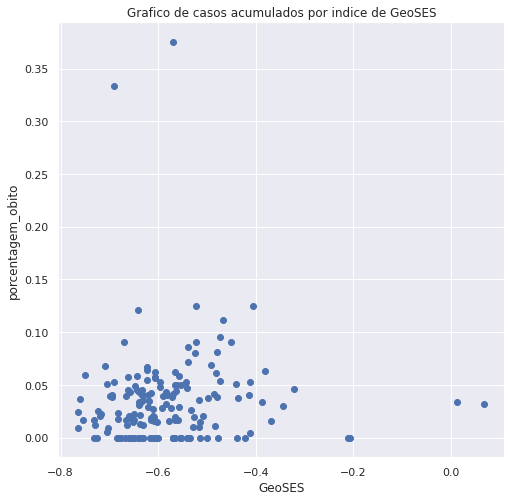

In [185]:
x = "GeoSES"
y = "porcentagem_obito"
populacao_casoacumulado = principais_dados.loc[:,[x,y]]
plt.figure(figsize=(8, 8))
plt.scatter(x=x, y=y, data=populacao_casoacumulado)
plt.xlabel(x)
plt.ylabel(y)
plt.title('Grafico de casos acumulados por indice de GeoSES')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Porcentagem da População por Município Contagiada')

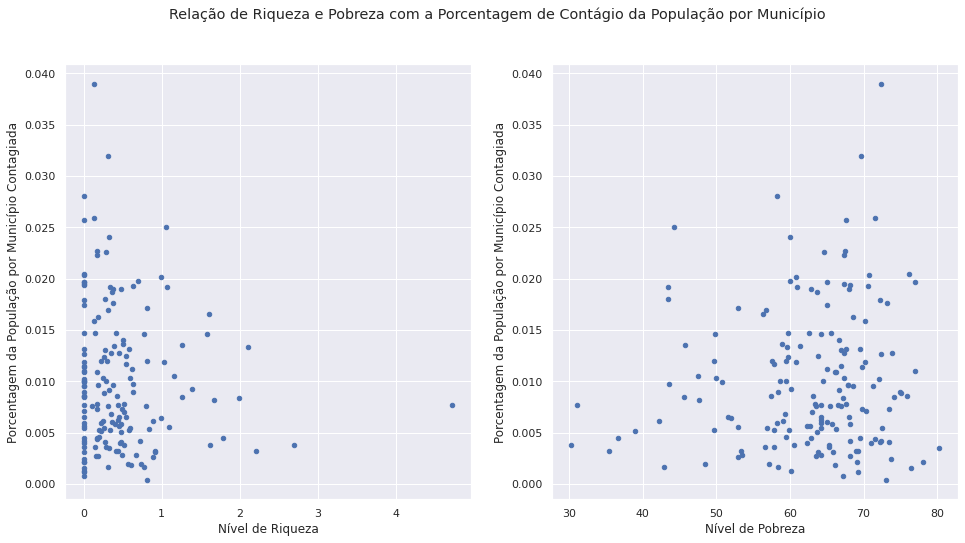

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [186]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('Relação de Riqueza e Pobreza com a Porcentagem de Contágio da População por Município')

## Colunas do Dataset que serão utilizadas
x1 = "riqueza"
x2 = "pobreza"
y = "porcent_pop_contagiada"

populacao_casoacumulado = principais_dados.loc[:,[x1,y]]
plt.figure(figsize=(15, 15))
populacao_casoacumulado.plot(kind='scatter',x=x1,y=y, ax=ax1)
ax1.set_xlabel('Nível de Riqueza')
ax1.set_ylabel('Porcentagem da População por Município Contagiada')


populacao_casoacumulado = principais_dados.loc[:,[x2,y]]
plt.figure(figsize=(15, 15))
populacao_casoacumulado.plot(kind='scatter',x=x2,y=y,ax=ax2)
ax2.set_xlabel('Nível de Pobreza')
ax2.set_ylabel('Porcentagem da População por Município Contagiada')

In [187]:
fig = px.scatter(principais_dados, x="pobreza", y="porcent_pop_contagiada", color='municipio',
                 title="Relaçao da Porcentagem da População Contagiada com Covid com o Indice de Pobreza",
                 labels={'pobreza':'Indice de Pobreza (Quanto maior pior)',
                         'porcent_pop_contagiada':'Porcentagem de habitantes contagiados por município',
                         'municipio':'Município'})
fig.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Porcentagem de Óbito da População por Município Contagiada')

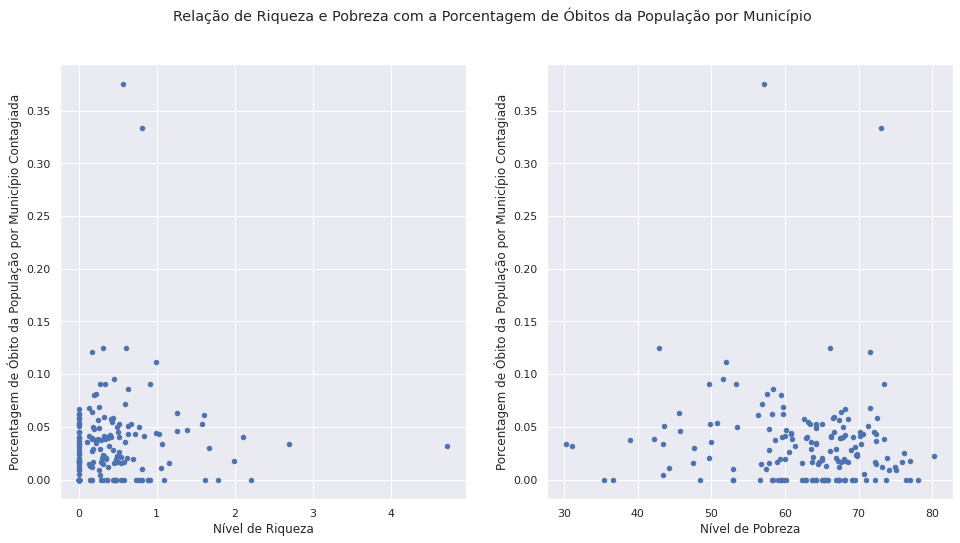

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [188]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('Relação de Riqueza e Pobreza com a Porcentagem de Óbitos da População por Município')

## Colunas do Dataset que serão utilizadas
x1 = "riqueza"
x2 = "pobreza"
y = "porcentagem_obito"

populacao_casoacumulado = principais_dados.loc[:,[x1,y]]
plt.figure(figsize=(15, 15))
populacao_casoacumulado.plot(kind='scatter',x=x1,y=y, ax=ax1)
ax1.set_xlabel('Nível de Riqueza')
ax1.set_ylabel('Porcentagem de Óbito da População por Município Contagiada')


populacao_casoacumulado = principais_dados.loc[:,[x2,y]]
plt.figure(figsize=(15, 15))
populacao_casoacumulado.plot(kind='scatter',x=x2,y=y,ax=ax2)
ax2.set_xlabel('Nível de Pobreza')
ax2.set_ylabel('Porcentagem de Óbito da População por Município Contagiada')

In [189]:
fig = px.scatter(principais_dados, x="pobreza", y="porcentagem_obito", color='municipio',
                 title="Relaçao da Porcentagem de Óbitos por Covid com o Indice de Pobreza",
                 labels={'pobreza':'Indice de Pobreza (Quanto maior pior)',
                         'porcentagem_obito':'Porcentagem de óbito por município',
                         'municipio':'Município'})
fig.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Porcentagem da População por Município Contagiada')

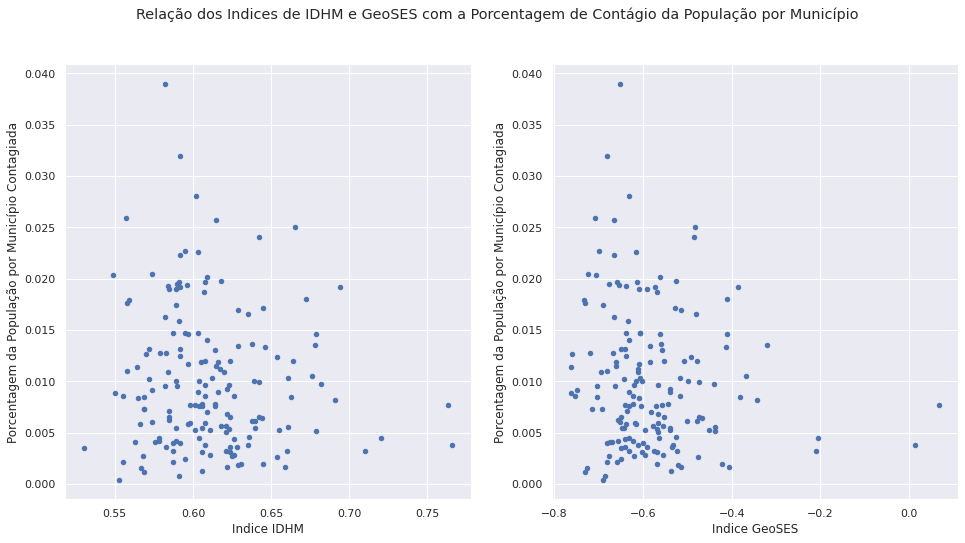

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [190]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('Relação dos Indices de IDHM e GeoSES com a Porcentagem de Contágio da População por Município')

## Colunas do Dataset que serão utilizadas
x1 = "IDHM"
x2 = "GeoSES"
y = "porcent_pop_contagiada"

populacao_casoacumulado = principais_dados.loc[:,[x1,y]]
plt.figure(figsize=(15, 15))
populacao_casoacumulado.plot(kind='scatter',x=x1,y=y, ax=ax1)
ax1.set_xlabel('Indice IDHM')
ax1.set_ylabel('Porcentagem da População por Município Contagiada')


populacao_casoacumulado = principais_dados.loc[:,[x2,y]]
plt.figure(figsize=(15, 15))
populacao_casoacumulado.plot(kind='scatter',x=x2,y=y,ax=ax2)
ax2.set_xlabel('Indice GeoSES')
ax2.set_ylabel('Porcentagem da População por Município Contagiada')

In [191]:
fig = px.scatter(principais_dados, x="IDHM", y="porcent_pop_contagiada", color='municipio',
                 title="Relaçao da Porcentagem de Óbitos por Covid com o Indice de Pobreza",
                 labels={'IDHM':'IDHM - Indice de Desenvolvimento Humano - Municipal',
                         'porcent_pop_contagiada':'Porcentagem de óbito por município',
                         'municipio':'Município'})
fig.show()

In [192]:
fig = px.scatter(principais_dados, x="GeoSES", y="porcent_pop_contagiada", color='municipio',
                 title="Relaçao da Porcentagem de Óbitos por Covid com o Indice de Pobreza",
                 labels={'GeoSES':'GeoSES - Índice Socioeconômico do Contexto Geográfico para Estudos em Saúde',
                         'porcent_pop_contagiada':'Porcentagem de óbito por município',
                         'municipio':'Município'})
fig.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Porcentagem da População por Município Contagiada')

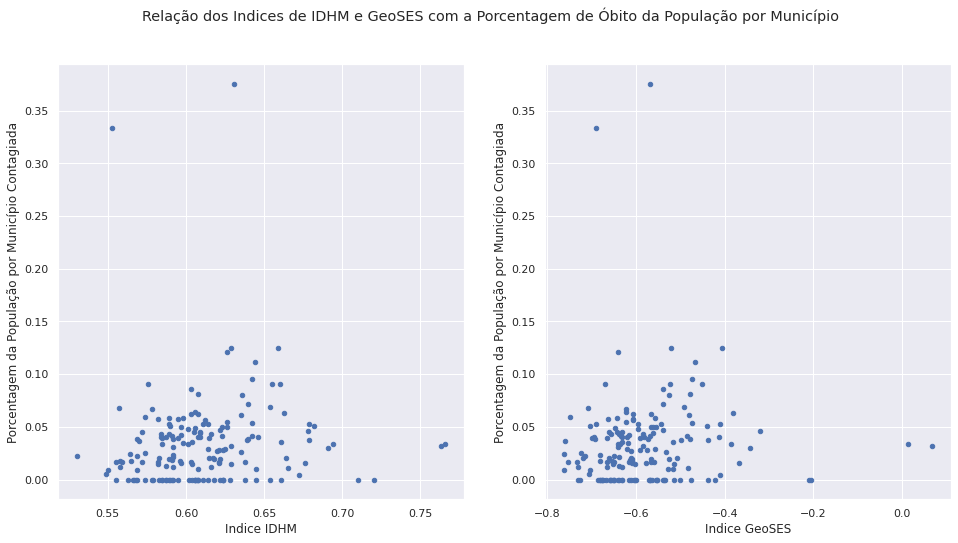

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [193]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('Relação dos Indices de IDHM e GeoSES com a Porcentagem de Óbito da População por Município')

## Colunas do Dataset que serão utilizadas
x1 = "IDHM"
x2 = "GeoSES"
y = "porcentagem_obito"

populacao_casoacumulado = principais_dados.loc[:,[x1,y]]
plt.figure(figsize=(15, 15))
populacao_casoacumulado.plot(kind='scatter',x=x1,y=y, ax=ax1)
ax1.set_xlabel('Indice IDHM')
ax1.set_ylabel('Porcentagem da População por Município Contagiada')


populacao_casoacumulado = principais_dados.loc[:,[x2,y]]
plt.figure(figsize=(15, 15))
populacao_casoacumulado.plot(kind='scatter',x=x2,y=y,ax=ax2)
ax2.set_xlabel('Indice GeoSES')
ax2.set_ylabel('Porcentagem da População por Município Contagiada')

In [194]:
fig = px.scatter(principais_dados, x="IDHM", y="porcentagem_obito", color='municipio',
                 title="Relaçao da Porcentagem de Óbitos por Covid com o Indice de Pobreza",
                 labels={'IDHM':'IDHM - Indice de Desenvolvimento Humano - Municipal',
                         'porcentagem_obito':'Porcentagem de óbito por município',
                         'municipio':'Município'})
fig.show()

In [195]:
fig = px.scatter(principais_dados, x="GeoSES", y="porcentagem_obito", color='municipio',
                 title="Relaçao da Porcentagem de Óbitos por Covid com o Indice de Pobreza",
                 labels={'GeoSES':'GeoSES - Índice Socioeconômico do Contexto Geográfico para Estudos em Saúde',
                         'porcentagem_obito':'Porcentagem de óbito por município',
                         'municipio':'Município'})
fig.show()

In [196]:
#encoding = "cp1252"
#encoding = "ISO-8859-1"
#dados_rn = pd.read_csv('/content/drive/My Drive/Projeto Ciencia de dados - COVID 19/OpenSus/dados-rn.csv', encoding = "ISO-8859-1", sep=";",engine='python',error_bad_lines=False)
#dados_rn.shape

Skipping line 39844: Expected 33 fields in line 39844, saw 34
Skipping line 116131: Expected 33 fields in line 116131, saw 34
Skipping line 117304: Expected 33 fields in line 117304, saw 34
Skipping line 125167: Expected 33 fields in line 125167, saw 34
Skipping line 198684: Expected 33 fields in line 198684, saw 34
Skipping line 221162: Expected 33 fields in line 221162, saw 34


(274757, 33)